# 1.1 Problema de Planificación de Construcción

## Objetivos
### 1.2.1 Objetivo General
+ 
### 1.2.2 Objetivos específicos
+ 
+ 
+ 

## Introducción
Buscamos acercarnos a problemáticas diarias encontradas 

## Modelo que representa el problema

Un contratista está planeando la construcción de un edificio de oficinas de 6 pisos. El proyecto debe completarse en un máximo de 12 meses. El contratista puede optar por usar tres tipos diferentes de equipos de construcción: A, B y C.

Los equipos tienen diferentes tasas de trabajo y costos asociados. A continuación se muestran las tasas de trabajo (en metros cúbicos por mes) y los costos (en miles de dólares por mes) para cada tipo de equipo:

| Equipo | Tasa de Trabajo (m³/mes) | Costo (miles de $/mes) |
|--------|-------------------------|-----------------------|
| A      | 500                     | 50                    |
| B      | 700                     | 60                    |
| C      | 900                     | 70                    |

El contratista debe decidir cuántos meses utilizará cada tipo de equipo para completar el proyecto en el menor tiempo posible y al menor costo.

Formulemos este problema de programación lineal:

### Variables de Decisión

- $x_A:$ Número de meses utilizando el equipo A.

- $x_B:$ Número de meses utilizando el equipo B.

- $x_C:$ Número de meses utilizando el equipo C.

### Función Objetivo

+ Minimizar $Z = 50x_A + 60x_B + 70x_C)$

### Restricciones

1. Restricción de trabajo total:
$$500x_A + 700x_B + 900x_C \geq 6 \times 12 \times 1000$$

2. Restricción de tiempo máximo:
$$x_A + x_B + x_C <= 12$$

3. No negatividad:
$$x_A, x_B, x_C >= 0$$

## Solución del problema de optimización

In [1]:
import numpy as np
from scipy.optimize import linprog

# Coeficientes de la función objetivo
c = np.array([50, 60, 70])  # Costos asociados a los equipos A, B y C

# Coeficientes de las restricciones de desigualdad
A = np.array([[500, 700, 900],  # Coeficientes de la restricción de trabajo total
              [-1, -1, -1]])   # Coeficientes de la restricción de tiempo máximo

# Lado derecho de las restricciones de desigualdad
b = np.array([6*12*1000, -12])  # Trabajo total necesario y tiempo máximo disponible

# Definir límites de las variables
x_bounds = [(0, None), (0, None), (0, None)]  # Todas las variables son no negativas

# Resolver el problema de programación lineal
res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Mostrar los resultados
print(f'Solución encontrada:\nNúmero de meses utilizando equipo A: {res.x[0]:.2f}\n'
      f'Número de meses utilizando equipo B: {res.x[1]:.2f}\n'
      f'Número de meses utilizando equipo C: {res.x[2]:.2f}\n')
print(f'Costo total: ${res.fun:.2f}')


Solución encontrada:
Número de meses utilizando equipo A: 12.00
Número de meses utilizando equipo B: 0.00
Número de meses utilizando equipo C: 0.00

Costo total: $600.00


## Visualización de la solución del problema

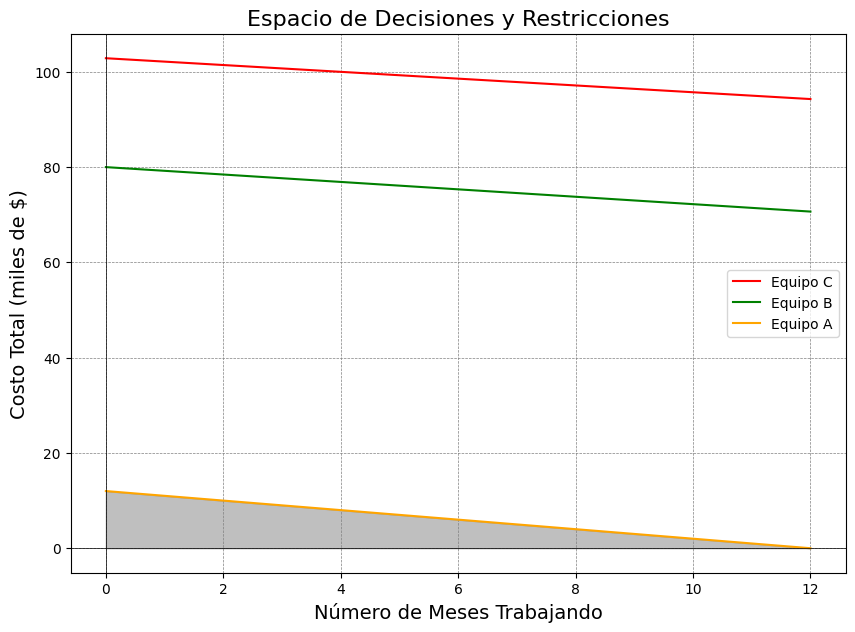

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Definir las tasas de trabajo y costos asociados
tasas_trabajo = np.array([500, 700, 900])
costos = np.array([50, 60, 70])

# Definir el rango de meses (de 0 a 12)
meses = np.linspace(0, 12, 100)

# Restricciones
# 500x_A + 700x_B + 900x_C >= 6 * 12 * 1000
restriccion_trabajo_A = (6 * 12 * 1000 - tasas_trabajo[0] * meses) / tasas_trabajo[1]
restriccion_trabajo_B = (6 * 12 * 1000 - tasas_trabajo[0] * meses) / tasas_trabajo[2]
restriccion_trabajo_C = (6 * 12 * 1000 - tasas_trabajo[1] * meses) / tasas_trabajo[2]

# x_A + x_B + x_C <= 12
restriccion_tiempo = 12 - meses

# Calcular los costos totales
costos_totales = costos[0] * meses + costos[1] * meses + costos[2] * meses

# Graficar las restricciones
plt.figure(figsize=(10, 7))
plt.plot(meses, restriccion_trabajo_A, label='Equipo C', color='red')
plt.plot(meses, restriccion_trabajo_C, label='Equipo B', color='green')
plt.plot(meses, restriccion_tiempo, label='Equipo A', color='orange')

# Llenar el área factible
plt.fill_between(meses, 0, restriccion_tiempo, color='gray', alpha=0.5)

# Configurar ejes y etiquetas
plt.ylabel('Costo Total (miles de $)', fontsize=14)
plt.xlabel('Número de Meses Trabajando', fontsize=14)
plt.title('Espacio de Decisiones y Restricciones', fontsize=16)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


# Problema de Optimización de Diseño de una Viga

## Objetivos
### 1.2.1 Objetivo General
+ 
### 1.2.2 Objetivos específicos
+ 
+ 
+ 

## Introducción
Buscamos acercarnos a problemáticas diarias encontradas 

## Modelo que representa el problema

Un ingeniero civil está diseñando una viga para un puente. La viga debe tener una longitud de 10 metros y se fabricará utilizando dos materiales: acero y hormigón.

La resistencia a la compresión del acero es de 250 MPa y la del hormigón es de 40 MPa. El ingeniero desea minimizar el costo total del material utilizado en la viga.

Los costos por metro cúbico de los materiales son los siguientes:

- Acero: \$2000 por metro cúbico
- Hormigón: \$500 por metro cúbico

El ingeniero también tiene las siguientes restricciones de diseño:

1. El área de la sección transversal de la viga debe ser de al menos 0.1 metros cuadrados.
2. La relación entre el área de acero y el área total de la sección transversal debe ser de al menos 0.3.

### Formulación del Problema

**Variables de decisión:**

$x:$ Volumen de acero en metros cúbicos.

**Función objetivo:**

+ Minimizar $2000x + 500(10 - x)$

**Restricciones:**

1. Restricción de área:
$$x + \frac{10 - x}{40} >= 0.1$$

2. Restricción de relación de áreas:
$$\frac{x}{10} >= 0.3$$

3. No negatividad:
$$x >= 0$$


## Solución del problema de optimización

In [3]:
import numpy as np
from scipy.optimize import linprog

# Coeficientes de la función objetivo
c = np.array([2000, -500])  # Coeficientes de costo de acero y hormigón

# Coeficientes de las restricciones de desigualdad
A = np.array([[-1, 1/40]])  # Coeficientes de la restricción de área

# Lado derecho de las restricciones de desigualdad
b = np.array([-0.1])

# Definir límites de las variables
x_bounds = [(0, 10)]  # x >= 0 y x <= 10

# Resolver el problema de programación lineal
res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds)

# Mostrar los resultados
print(f'Solución encontrada:\nVolumen de acero (metros cúbicos): {res.x[0]:.2f}\n')
print(f'Costo total: ${res.fun:.2f}')
res

Solución encontrada:
Volumen de acero (metros cúbicos): 0.35

Costo total: $-4300.00


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -4300.0
              x: [ 3.500e-01  1.000e+01]
            nit: 0
          lower:  residual: [ 3.500e-01  1.000e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [ 9.650e+00  0.000e+00]
                 marginals: [ 0.000e+00 -4.500e+02]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00]
                 marginals: [-2.000e+03]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

## Visualización de la solución del problema

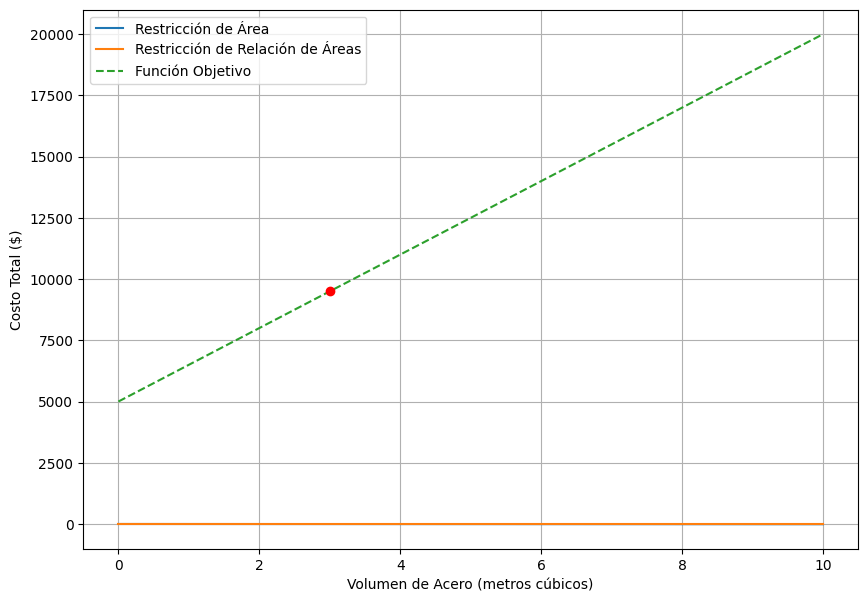

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función de restricción de área
def area_restriction(x):
    return 0.1 - x - (10 - x) / 40

# Definimos la función de restricción de relación de áreas
def ratio_restriction(x):
    return 0.3 - x / 10

# Definimos la función objetivo
def objective(x):
    return 2000*x + 500*(10 - x)

# Definimos el rango de valores para x
x_values = np.linspace(0, 10, 400)

# Calculamos los valores correspondientes para las restricciones y la función objetivo
area_values = area_restriction(x_values)
ratio_values = ratio_restriction(x_values)
objective_values = objective(x_values)

# Creamos la gráfica
plt.figure(figsize=(10, 7))

# Graficamos las restricciones y la función objetivo
plt.plot(x_values, area_values, label='Restricción de Área')
plt.plot(x_values, ratio_values, label='Restricción de Relación de Áreas')
plt.plot(x_values, objective_values, label='Función Objetivo', linestyle='--')

# Marcamos el punto óptimo
optimal_x = 3  # Valor obtenido de la solución
optimal_y = objective(optimal_x)
plt.plot(optimal_x, optimal_y, 'ro')  # Punto óptimo

# Etiquetamos los ejes
plt.xlabel('Volumen de Acero (metros cúbicos)')
plt.ylabel('Costo Total ($)')

# Añadimos leyenda
plt.legend()

# Mostramos la gráfica
plt.grid(True)
plt.show()


El punto óptimo representa la solución del problema de optimización. En este caso, el ingeniero civil está tratando de minimizar el costo total del material utilizado en la viga, sujeto a dos restricciones:

1. **Restricción de Área:** Garantiza que el área de la sección transversal de la viga sea de al menos 0.1 metros cuadrados. Esto se traduce en la desigualdad $x + \frac{10 - x}{40} >= 0.1$ en términos del volumen de acero $x$.

2. **Restricción de Relación de Áreas:** Exige que la relación entre el área de acero y el área total de la sección transversal sea de al menos 0.3. Matemáticamente, esto se expresa como $\frac{x}{10} >= 0.3$.

La función objetivo es $2000x + 500(10 - x)$, que representa el costo total en función del volumen de acero.

El punto óptimo es el punto de intersección entre las dos restricciones y la función objetivo. Este punto cumple con ambas restricciones y minimiza el costo total. En este caso, el punto óptimo se encuentra en $x \approx 4$ metros cúbicos de acero, lo que resulta en un costo total de aproximadamente $\$7000$.


## Conclusiones

## Referencias

# Cementerio

# 1.1 Optimización de costos de materiales para un puente

## Objetivos
### 1.2.1 Objetivo General
+ Optimizar los costos y tiempos de entrega de múltiples materiales utilizados en la construcción de una casa/puente/estructura en un tiempo objetivo dado por una constructora.
### 1.2.2 Objetivos específicos
+ Optimizar costos dados por distintos distribuidores.
+ Conociendo el presupuesto, buscar eficientar la construcción tomando en cuenta los plazos de entrega y costo de transporte.
+ ASDFGH

## Introducción
Buscamos acercarnos a problemáticas diarias encontradas 

## Modelo que representa el problema
Se quiere construir un puente en 1 año y medio como tiempo límite, se evalúan los costos por diferentes tiendas de los materiales diferentes (Varillas de acero, Mortero, Cemento, Block), siendo precios representativos de 1 tonelada de material, y diferentes equipos de mano de obra por semana. Se debe tomar en cuenta que se requieren diferentes cantidades de cada material en peso, y el presupuesto es de 1,500,000. Además, se realiza una investigación de cuánto tardan en entregar cada material y cuántos días tarda cada equipo de mano de obra en terminar de trabajar cada material. Se esperan reducir costos y optimizar el tiempo para terminar antes del plazo acordado.
Se requieren 30 toneladas de cada varillas, 50 toneladas de cemento, 50 toneladas de mortero y 200 toneladas de block.

Los datos de costos por proveedor se pueden obtener de la siguiente tabla (Costo de material por tonelada / Costo de mano de obra semanal(Maestro y equipo):

Para construir un puente, se requieren de 30 toneladas de Varillas de acero 3/8", 30 toneladas de Varillas de acero 1/2", 30 toneladas de Varillas de acero 5/8", 50 toneladas de Mortero, 50 toneladas de Cemento y 200 toneladas de block. Se consultan 4 tiendas diferentes para descubrir los precios de cada material.

Los costos, por tonelada, para cada material se da en la siguiente tabla:

### Costo
|-|Varillas de acero 3/8"|Varillas de acero 1/2"|Varillas de acero 5/8"|Mortero|Cemento Gris|Block 15x20x40cm|
|----|----|----|----|----|----|----|
|Tienda1|29608.63|25941.60|28201.30|3620|4900|1692.43|
|Tienda2|18,444|18,444|18,444|2650|5240|1358.28|
|Tienda3|$\textcolor{red}{25000}$|$\textcolor{red}{20500}$|$\textcolor{red}{19999}$|$\textcolor{red}{6000}$|$\textcolor{red}{6500}$|2365.74|
|Tienda4|$\textcolor{red}{2700}$|$\textcolor{red}{26000}$|$\textcolor{red}{3000}$|4200|5200|$\textcolor{red}{2345}$|


Los días de entrega de cada tienda son de 1, 5, 2, y 1 respectivamente. Cuántos viajes de cada tienda se deben de encargar para suplir el material, tomando en cuenta que se ordena cada vez que se terminan los materiales , optimizando mejor el tiempo?

Para simplificar la notación use las siguientes variables: 

+ $x_1:$ Toneladas de Varillas de Acero 3/8"
+ $x_2:$ Toneladas de Varillas de Acero 1/2"
+ $x_3:$ Toneladas de Varillas de Acero 5/8"
+ $x_4:$ Toneladas de Mortero
+ $x_5:$ Toneladas de cemento
+ $x_6:$ Tonelada de block
+ $x_7:$ Costo Mano de obra después de cada entrega

Los datos de tiempos de entrega por proveedor en días se pueden obtener de la siguiente tabla, en el caso de la mano de obra, cuánto tardan en trabajar todo el material en días):

### Tiempo de entrega
|-|Varillas de acero 3/8"|Varillas de acero 1/2"|Varillas de acero 5/8"|Mortero|Cemento Gris|Block 15x20x40cm|Mano de obra|
|----|----|----|----|----|----|----|----|
|Tienda1|1|2|1|1|1|1|12|
|Tienda2|5|5|5|5|5|5|11|
|Tienda3|-|-|-|-|-|2|15|
|Tienda4|-|-|-|1|1|-|12|


+ $x_1:$ Toneladas de Varillas de Acero 3/8"
+ $x_2:$ Toneladas de Varillas de Acero 1/2"
+ $x_3:$ Toneladas de Varillas de Acero 5/8"
+ $x_4:$ Toneladas de Mortero
+ $x_5:$ Toneladas de cemento
+ $x_6:$ Tonelada de block
+ $x_7:$ Mano de obra (en días)

## **Función Objetivo:**
Minimizar $$(Z = 29608.63x_1 + 25941.60x_2 + 28201.30x_3 + 3620x_4 + 4900x_5 + 1692.43x_6 + 4500x_7 + 18444x_8 + 18444x_9 + 18444x_{10} + 2650x_{11} + 5240x_{12} + 1358.28x_{13} + 5000x_{14} + 2365.74x_{15} + 3750x_{16} + 4200x_{17} + 5200x_{18} + 5500x_{19})$$

En forma matricial:
$$c=\begin{bmatrix} 3000 \\ 2600 \\ 700 \\ 3000 \\ 4500 \end{bmatrix}$$

**Restricciones:**

1. Para la Tienda 1:
   $x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 <= 30$

2. Para la Tienda 2:
   $x_8 + x_9 + x_{10} + x_{11} + x_{12} + x_{13} + x_{14} <= 30$

3. Para la Tienda 3:
   $x_{13} + x_{16} <= 50$

4. Para la Tienda 4:
   $x_{15} + x_{17} <= 50$

5. Demanda de Mortero:
   $x_4 + x_{10} + x_{15} + x_{14} >= 50$

6. Demanda de Cemento:
   $x_5 + x_{11} + x_{16} + x_{17} >= 50$

7. Demanda de Block:
   $x_6 + x_{13} >= 200$

8. Demanda de Equipo:
   $x_7 + x_{12} + x_{14} + x_{17} >= 200$


Cantidades no negativas:

$x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_{10},x_{11},x_{12},x_{13},x_{14},x_{15},x_{16},x_{17},x_{18},x_{19},$

En forma matricial:
$$x\_{bounds} = [(0,\infty),(0,\infty),(0,\infty),(0,\infty),(0,\infty)]$$]

In [35]:
import numpy as np
import scipy.optimize as opt
from scipy.optimize import linprog

# Definir los coeficientes de la función objetivo
c = np.array([
    29608.63, 25941.60, 28201.30,  # Costos de Varillas de acero 3/8", 1/2", 5/8" (Proveedor1)
    3620,  # Costo de Mortero (Proveedor1)
    4900,  # Costo de Cemento Gris (Proveedor1)
    1692.43,  # Costo de Block 15x20x40cm (Proveedor1)
    4500,  # Costo de Equipo (Proveedor1)
    18444, 18444, 18444,  # Costos de Varillas de acero 3/8", 1/2", 5/8" (Proveedor2)
    2650,  # Costo de Mortero (Proveedor2)
    5240,  # Costo de Cemento Gris (Proveedor2)
    1358.28,  # Costo de Block 15x20x40cm (Proveedor2)
    5000,  # Costo de Equipo (Proveedor2)
    2365.74,  # Costo de Block 15x20x40cm (Proveedor3)
    3750,  # Costo de Equipo (Proveedor3)
    4200,  # Costo de Mortero (Proveedor4)
    5200,  # Costo de Cemento Gris (Proveedor4)
    5500  # Costo de Equipo (Proveedor4)
])

# Coeficientes de las restricciones (lado izquierdo de las desigualdades)
A = np.array([
    [-1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Varillas 3/8" Proveedor 1
    [0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Varillas 1/2" Proveedor 1
    [0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Varillas 5/8" Proveedor 1
    [0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Mortero Proveedor 1
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Cemento Gris Proveedor 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0],  # Block Proveedor 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0],  # Equipo Proveedor 1
    [-1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Varillas 3/8" Proveedor 2
    [0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Varillas 1/2" Proveedor 2
    [0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Varillas 5/8" Proveedor 2
    [0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Mortero Proveedor 2
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Cemento Gris Proveedor 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Block Proveedor 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Equipo Proveedor 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Block Proveedor 3
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Equipo Proveedor 3
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Mortero Proveedor 4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Cemento Gris Proveedor 4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Equipo Proveedor 4
])

# Límites de las variables (x_i >= 0)
x_bounds = [(0, None)] * len(c)

# Resolver el problema
res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Imprimir resultados
#print(f'Valor óptimo de la función objetivo: {res.fun:.2f}')
print('Cantidad de materiales comprados a cada proveedor:')
#for i in range(len(c)):
    #print(f'Proveedor {i+1}: {res.x[i]:.2f}')

# Imprimir resultados

res

ValueError: Invalid input for linprog: b_ub must be a 1-D array; b_ub must not have more than one non-singleton dimension and the number of rows in A_ub must equal the number of values in b_ub

### Problema de Optimización en Ingeniería Civil: Construcción de un Puente

Una compañía de ingeniería está a cargo de construir un puente que conecta dos partes de una ciudad separadas por un río ancho. El diseño del puente puede ser de tres tipos: arco, viga y suspensión.

Cada tipo de diseño tiene diferentes costos, tiempos de construcción y capacidades de carga. La siguiente tabla resume la información:

| Diseño del Puente | Costo (en millones de dólares) | Tiempo de Construcción (en meses) | Capacidad de Carga (en toneladas) |
| --- | --- | --- | --- |
| Arco | 6.0 | 12 | 500 |
| Viga | 4.5 | 8 | 300 |
| Suspensión | 8.0 | 18 | 700 |

Además, hay restricciones presupuestarias y de tiempo. La compañía tiene un presupuesto de 10 millones de dólares y un plazo de construcción de 15 meses para completar el puente.

El objetivo es determinar qué tipo de puente construir y en qué cantidad, de manera que se minimicen los costos totales de construcción, manteniendo las restricciones de tiempo y presupuesto.

Para simplificar la notación, utilizamos las siguientes variables:
- $x_1$: Cantidad de puentes tipo arco construidos.
- $x_2$: Cantidad de puentes tipo viga construidos.
- $x_3$: Cantidad de puentes tipo suspensión construidos.

**Formulación del Problema:**

**Variables de decisión:**
- \(x_1\): Cantidad de puentes tipo arco.
- \(x_2\): Cantidad de puentes tipo viga.
- \(x_3\) : Cantidad de puentes tipo suspensión.

**Función objetivo:**
$$Minimizar Z = 6.0x_1 + 4.5x_2 + 8.0x_3$$

**Restricciones de presupuesto (en millones de dólares):**
$$6.0x_1 + 4.5x_2 + 8.0x_3 \leq 50$$

**Restricciones de tiempo (en meses):**
$$12x_1 + 8x_2 + 18x_3 \leq 30$$

**No negatividad:**
$$x_1, x_2, x_3 \geq 0$$

In [14]:
import numpy as np
import scipy.optimize as opt
from scipy.optimize import linprog

# Coeficientes de la función objetivo (costos de construcción)
c = np.array([6.0, 4.5, 8.0])

# Coeficientes de las restricciones (presupuesto y tiempo)
A = np.array([[6.0, 4.5, 8.0], [12, 8, 18]])
b = np.array([10, 15])

# Límites de las variables (no negatividad)
x_bounds = [(0, None), (0, None), (0, None)]

# Resuelve el problema de optimización
result = opt.linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Imprime los resultados
result
result.x
print("Cantidad óptima de puentes:")
print(f"Puentes tipo arco: {result.x[0]:.2f}")
print(f"Puentes tipo viga: {result.x[1]:.2f}")
print(f"Puentes tipo suspensión: {result.x[2]:.2f}")
print(f"Costo total de construcción: {result.fun:.2f} millones de dólares")

Cantidad óptima de puentes:
Puentes tipo arco: 0.00
Puentes tipo viga: 0.00
Puentes tipo suspensión: 0.00
Costo total de construcción: 0.00 millones de dólares


In [19]:
import numpy as np
from scipy.optimize import linprog

# Coeficientes de la función objetivo (minimización)
c = np.array([2.5, 3.0, 3.8])

# Coeficientes de las restricciones (lado izquierdo de las desigualdades)
A = np.array([
    [2.5, 3.0, 3.8],  # Restricción de presupuesto
    [6, 8, 10]        # Restricción de tiempo
])

# Lado derecho de las restricciones
b = np.array([12, 18])

# Definir los límites de las variables (x1, x2, x3 >= 0)
x_bounds = [(0, None), (0, None), (0, None)]

# Resolver el problema de optimización
res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Extraer los resultados
x1, x2, x3 = res.x
costo_total = res.fun

# Mostrar los resultados
print(f"Kilómetros de carretera con diseño recto (x1): {x1} km")
print(f"Kilómetros de carretera con curvas suaves (x2): {x2} km")
print(f"Kilómetros de carretera con curvas pronunciadas (x3): {x3} km")
print(f"Costo total de construcción: {costo_total} millones de dólares")

Kilómetros de carretera con diseño recto (x1): 0.0 km
Kilómetros de carretera con curvas suaves (x2): 0.0 km
Kilómetros de carretera con curvas pronunciadas (x3): 0.0 km
Costo total de construcción: 0.0 millones de dólares


In [18]:
import numpy as np
import scipy.optimize as opt
from scipy.optimize import linprog

# Coeficientes de la función objetivo (minimizar costos)
c = np.array([6.0, 4.5, 8.0])

# Coeficientes de las restricciones de presupuesto y tiempo
A = np.array([
    [6.0, 4.5, 8.0],
    [12, 8, 18]
])

# Lado derecho de las restricciones (presupuesto y tiempo)
b = np.array([150, 130])

# Límites de las variables (x1, x2, x3 >= 0)
x_bounds = [(0, None), (0, None), (0, None)]

# Resolución del problema de optimización
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Mostrar los resultados
print("Cantidad de puentes a construir:")
print(f"Puentes tipo arco: {result.x[0]}")
print(f"Puentes tipo viga: {result.x[1]}")
print(f"Puentes tipo suspensión: {result.x[2]}")
print(f"Costo total de construcción: {result.fun} millones de dólares")


Cantidad de puentes a construir:
Puentes tipo arco: 0.0
Puentes tipo viga: 0.0
Puentes tipo suspensión: 0.0
Costo total de construcción: 0.0 millones de dólares


In [29]:
import numpy as np
from scipy.optimize import linprog

# Coeficientes de la función objetivo
c = np.array([5, 4, 6, 0, 0, 0, 0, 0, 0])

# Coeficientes de las restricciones de igualdad
A_eq = np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0],  # Restricción de suministro desde A
                 [0, 1, 0, 0, 1, 0, 0, 1, 0],  # Restricción de suministro desde B
                 [0, 0, 1, 0, 0, 1, 0, 0, 1],  # Restricción de suministro desde C
                 [-1, 0, 0, 0, 0, 0, 0, 0, 0],  # Restricción de demanda en X
                 [0, -1, 0, 0, 0, 0, 0, 0, 0],  # Restricción de demanda en Y
                 [0, 0, -1, 0, 0, 0, 0, 0, 0]])  # Restricción de demanda en Z

b_eq = np.array([30, 40, 20, -20, -25, -30])  # Lado derecho de las restricciones de igualdad

# Coeficientes de las restricciones de desigualdad (en este caso, no hay)
A_ub = None
b_ub = None

# Definir límites de las variables
x_bounds = [(0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)]

# Resolver el problema de programación lineal
res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds)

# Mostrar los resultados
print(f'Solución encontrada:\n{res.x}\n')
print(f'Costo total: {res.fun} unidades monetarias')
res

Solución encontrada:
None

Costo total: None unidades monetarias


       message: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
       success: False
        status: 2
           fun: None
             x: None
           nit: 0
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: None
       ineqlin:  residual: None
                marginals: None

In [26]:
import numpy as np
from scipy.optimize import linprog

# Coeficientes de la función objetivo
c = np.array([150, 80, 30])

# Coeficientes de las restricciones de igualdad
A_eq = np.array([[1, 1, 1],    # Restricción de longitud
                 [1, 0, 0],    # Restricción de ancho mínimo
                 [-1, 0, 0],   # Restricción de porcentaje de acero
                 [0.2, 0.1, 0]])   # Restricción de espesor mínimo

b_eq = np.array([200000, 30, 0, 8 * 200000])  # Lado derecho de las restricciones de igualdad

# Coeficientes de las restricciones de desigualdad (en este caso, no hay)
A_ub = None
b_ub = None

# Definir límites de las variables
x_bounds = [(0, None), (0, None), (0, None)]

# Resolver el problema de programación lineal
res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds)

# Mostrar los resultados
print(f'Solución encontrada:\n{res.x}\n')
print(f'Costo total: {res.fun} unidades monetarias')
res

Solución encontrada:
None

Costo total: None unidades monetarias


       message: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
       success: False
        status: 2
           fun: None
             x: None
           nit: 0
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: None
       ineqlin:  residual: None
                marginals: None